In [1]:
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

## Web Scraping

In [2]:
#Scraping data from Wikipedia page using BeautifulSoup

response_obj = requests.get("https://en.wikipedia.org/wiki/List_of_districts_in_South_Korea").text
soup = BeautifulSoup(response_obj,"lxml")
District_Table = soup.find("table", {"class":"wikitable sortable"})
District_Table

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th>District</th>
<th><a href="/wiki/Korean_language" title="Korean language">Korean</a></th>
<th><a href="/wiki/Hanja" title="Hanja">Hanja</a></th>
<th>City</th>
<th>Population<br/><span style="font-size:85%;">(2012)</span></th>
<th>Area</th>
<th>Founded<br/><span style="font-size:85%;">(YYYY-MM-DD)</span></th>
<th>Type
</th></tr>
<tr>
<td align="left"><a href="/wiki/Danwon-gu" title="Danwon-gu">Danwon-gu</a>
</td>
<td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean language text">단원구</span></span>
</td>
<td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean language text">檀園區</span></span>
</td>
<td align="left"><a href="/wiki/Ansan" title="Ansan">Ansan</a>
</td>
<td>335,849
</td>
<td>91.23
</td>
<td>2002-11-01
</td>
<td align="left">Non-autonomous
</td></tr>
<tr>
<td align="left"><a href="/wiki/Sangnok-gu" title="Sangnok-gu">Sangnok-gu</a>
</td>
<td align="left"><s

In [4]:
#Table Preparation
District=[]
Korean = []
Hanja = []
City = []
Population = []
Area = []
Founded = []
Type = []

In [5]:
for row in District_Table.findAll("tr"):
    #print (row)    
    District_Korea = row.findAll('td')
    #print (len(Ward))
    print (District_Korea)
    if len(District_Korea)==8: #Only extract table body not heading
        print (District_Korea[0])
        District.append(District_Korea[0].find(text=True))
        Korean.append(District_Korea[1].find(text=True)) # useless
        Hanja.append(District_Korea[2].find(text=True))
        City.append(District_Korea[3].find(text=True))
        Population.append(District_Korea[4].find(text=True))
        Area.append(District_Korea[5].find(text=True))
        Founded.append(District_Korea[6].find(text=True))

[]
[<td align="left"><a href="/wiki/Danwon-gu" title="Danwon-gu">Danwon-gu</a>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean language text">단원구</span></span>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean language text">檀園區</span></span>
</td>, <td align="left"><a href="/wiki/Ansan" title="Ansan">Ansan</a>
</td>, <td>335,849
</td>, <td>91.23
</td>, <td>2002-11-01
</td>, <td align="left">Non-autonomous
</td>]
<td align="left"><a href="/wiki/Danwon-gu" title="Danwon-gu">Danwon-gu</a>
</td>
[<td align="left"><a href="/wiki/Sangnok-gu" title="Sangnok-gu">Sangnok-gu</a>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean language text">상록구</span></span>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean language text">常綠區</span></span>
</td>, <td align="left"><a href="/wiki/Ansan" title="Ansan">Ansan</a>
</td>, <td>380,574
</td>, <td>57.83
</td>, <td>20

In [6]:
import pandas as pd
District_df = pd.DataFrame(list(zip(District, City, Population, Area)),
              columns=['District','City', 'Population','Area'])

In [7]:
District_df.head()

,District,City,Population,Area
0,Danwon-gu,Ansan,"335,849",91.23
1,Sangnok-gu,Ansan,"380,574",57.83
2,Dongan-gu,Anyang,"353,381",21.92
3,Manan-gu,Anyang,"265,462",36.54
4,Buk District,Busan,"309,602",39.44


In [8]:
#Create new dataframe that only contain Seoul District
seoul_district = District_df[District_df.City == 'Seoul']
seoul_district.head()

,District,City,Population,Area
65,Dobong District,Seoul,"366,879",20.70
66,Dongdaemun District,Seoul,"366,633",14.20
67,Dongjak District,Seoul,"402,567",16.35
68,Eunpyeong District,Seoul,"491,741",29.71
69,Gangbuk District,Seoul,"345,502",23.61


In [9]:
#Reset index for new dataframe so it starts from 1
seoul_district.index = np.arange(1, len(seoul_district) + 1)

In [10]:
seoul_district.head()

,District,City,Population,Area
1,Dobong District,Seoul,"366,879",20.70
2,Dongdaemun District,Seoul,"366,633",14.20
3,Dongjak District,Seoul,"402,567",16.35
4,Eunpyeong District,Seoul,"491,741",29.71
5,Gangbuk District,Seoul,"345,502",23.61


In [11]:
#Another dataframe that contain location for district in Seoul
df_geo = pd.read_csv("Seoul_latlong.csv")
df_geo.head()

,District,Latitude,Longitude
0,Dobong District,37.670255,127.032688
1,Dongdaemun District,37.582540,127.055219
2,Dongjak District,37.499687,126.951246
3,Eunpyeong District,37.619948,126.925604
4,Gangbuk District,37.645173,127.009270


In [12]:
#Merge with previous dataframe
df_seoul = pd.merge(seoul_district, df_geo, how='left',
        left_on='District', right_on='District', validate="1:1")
df_seoul.head()

,District,City,Population,Area,Latitude,Longitude
0,Dobong District,Seoul,"366,879",20.70,37.670255,127.032688
1,Dongdaemun District,Seoul,"366,633",14.20,37.582540,127.055219
2,Dongjak District,Seoul,"402,567",16.35,37.499687,126.951246
3,Eunpyeong District,Seoul,"491,741",29.71,37.619948,126.925604
4,Gangbuk District,Seoul,"345,502",23.61,37.645173,127.009270


### Visualization of District in Seoul

In [13]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(timeout=3)
location = geolocator.geocode('Seoul, South Korea')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seoul are {}, {}.'.format(latitude, longitude))

/Users/ibm-jti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


The geograpical coordinate of Seoul are 37.5666791, 126.9782914.


In [14]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

Solving environment: done

# All requested packages already installed.



In [15]:
map_seoul = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map

for lat, lng, label in zip(df_seoul[' Latitude'], df_seoul[' Longitude'], df_seoul['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seoul)
    
map_seoul

## Foursquare API

In [16]:
CLIENT_ID = 'OIMP2UK0HDPGRBD1RXRT4WA4NLL35RVIAHPFXHL2UIIORP1V'
CLIENT_SECRET = 'FGUMF2EP3WMNEAU1132K22XHCI4VKNXRGGFFDJDBSVZZAM0F' 
VERSION = '20190820'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: OIMP2UK0HDPGRBD1RXRT4WA4NLL35RVIAHPFXHL2UIIORP1V
CLIENT_SECRET:FGUMF2EP3WMNEAU1132K22XHCI4VKNXRGGFFDJDBSVZZAM0F


In [17]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [19]:
#Get nearby venues for all district in Seoul
Seoul_Venues = getNearbyVenues(names=df_seoul['District'],
                                   latitudes=df_seoul[' Latitude'],
                                   longitudes=df_seoul[' Longitude']
                                  )

Dobong District
Dongdaemun District
Dongjak District
Eunpyeong District
Gangbuk District
Gangdong District
Gangnam District
Gangseo District
Geumcheon District
Guro District
Gwanak District
Gwangjin District
Jongno District
Jung District
Jungnang District
Mapo District
Nowon District
Seocho District
Seodaemun District
Seongbuk District
Seongdong District
Songpa District
Yangcheon District
Yeongdeungpo District
Yongsan District


In [20]:
print ("Shape of the Venues Dataframe: ", Seoul_Venues.shape)
Seoul_Venues.head()

Shape of the Venues Dataframe:  (1112, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Dobong District,37.670255,127.032688,방학동 도깨비시장,37.665427,127.035603,Market
1,Dobong District,37.670255,127.032688,수정궁,37.662404,127.032934,Chinese Restaurant
2,Dobong District,37.670255,127.032688,대문,37.663411,127.027870,Korean Restaurant
3,Dobong District,37.670255,127.032688,맥도날드 (McDonald's) (맥도날드),37.670196,127.043726,Fast Food Restaurant
4,Dobong District,37.670255,127.032688,PARIS BAGUETTE,37.662556,127.032938,Bakery


In [21]:
#Create dataframe that only contain restaurant

seoul_restaurant = Seoul_Venues[Seoul_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
seoul_restaurant.index = np.arange(1, len(seoul_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", seoul_restaurant.shape)
seoul_restaurant.head()

Shape of the Data-Frame with Venue Category only Restaurant:  (332, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Dobong District,37.670255,127.032688,수정궁,37.662404,127.032934,Chinese Restaurant
2,Dobong District,37.670255,127.032688,대문,37.663411,127.027870,Korean Restaurant
3,Dobong District,37.670255,127.032688,맥도날드 (McDonald's) (맥도날드),37.670196,127.043726,Fast Food Restaurant
4,Dobong District,37.670255,127.032688,강촌칼국수,37.662150,127.030537,Korean Restaurant
5,Dobong District,37.670255,127.032688,일심해장국,37.661906,127.029542,Korean Restaurant


In [22]:
#Restaurant maps in Seoul
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the Venues based on the Major Districts
Districts = seoul_restaurant['District']

x = np.arange(len(Districts))

for lat, lng, poi, distr in zip(seoul_restaurant['Venue_Lat'], 
                                  seoul_restaurant['Venue_Long'], 
                                  seoul_restaurant['Venue_Category'], 
                                  seoul_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_restaurants)
       
map_restaurants

## Exploratory Data Analysis

In [24]:
# Number of unique categories to find out type of restaurant in Seoul
print('There are {} unique categories.'.format(len(seoul_restaurant['Venue_Category'].unique())))
print (seoul_restaurant['Venue_Category'].value_counts())

There are 34 unique categories.
Korean Restaurant                141
Fast Food Restaurant              28
Chinese Restaurant                27
Japanese Restaurant               20
Italian Restaurant                16
Seafood Restaurant                13
Bunsik Restaurant                 11
Sushi Restaurant                  10
Asian Restaurant                   9
Vietnamese Restaurant              9
Restaurant                         6
Vegetarian / Vegan Restaurant      4
Mexican Restaurant                 4
Udon Restaurant                    3
French Restaurant                  3
American Restaurant                2
Ramen Restaurant                   2
Gukbap Restaurant                  2
Soba Restaurant                    2
Dumpling Restaurant                2
Indian Restaurant                  2
Middle Eastern Restaurant          2
Dim Sum Restaurant                 2
Spanish Restaurant                 2
Thai Restaurant                    1
Shabu-Shabu Restaurant             1
Samgye

In [25]:
# create a dataframe of top 10 restaurant categories
seoul_restaurant_Top10 = seoul_restaurant['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
seoul_restaurant_Top10= seoul_restaurant_Top10.reset_index()

seoul_restaurant_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
seoul_restaurant_Top10

,Venue_Category,Frequency
0,Korean Restaurant,141
1,Fast Food Restaurant,28
2,Chinese Restaurant,27
3,Japanese Restaurant,20
4,Italian Restaurant,16
5,Seafood Restaurant,13
6,Bunsik Restaurant,11
7,Sushi Restaurant,10
8,Asian Restaurant,9
9,Vietnamese Restaurant,9


In [27]:
seoul_restaurant_Top10.index = np.arange(1, len(seoul_restaurant_Top10) + 1)
seoul_restaurant_Top10

,Venue_Category,Frequency
1,Korean Restaurant,141
2,Fast Food Restaurant,28
3,Chinese Restaurant,27
4,Japanese Restaurant,20
5,Italian Restaurant,16
6,Seafood Restaurant,13
7,Bunsik Restaurant,11
8,Sushi Restaurant,10
9,Asian Restaurant,9
10,Vietnamese Restaurant,9


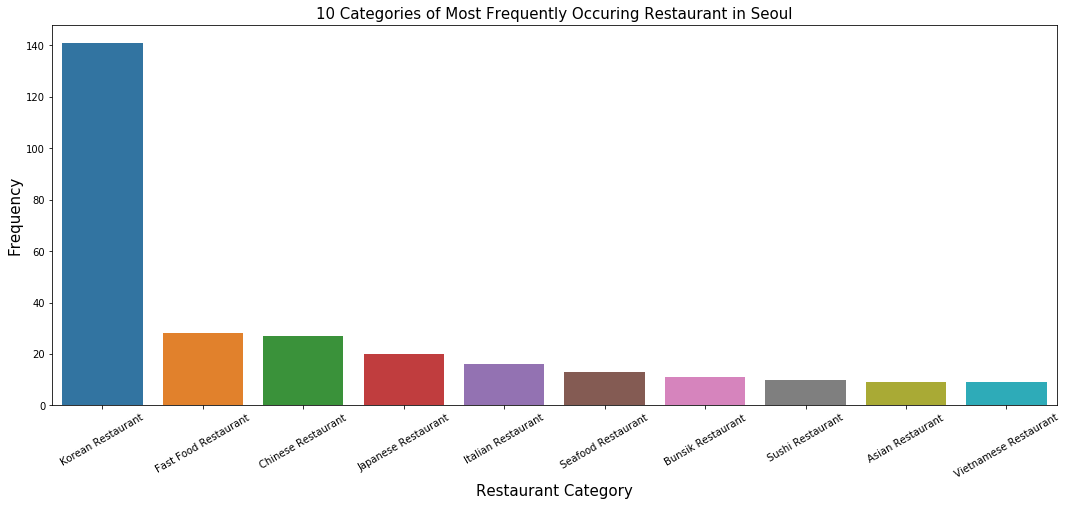

In [30]:
#Visualize top 10 restaurant in Seoul using bar graph
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=seoul_restaurant_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Categories of Most Frequently Occuring Restaurant in Seoul', fontsize=15)
plt.xlabel("Restaurant Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

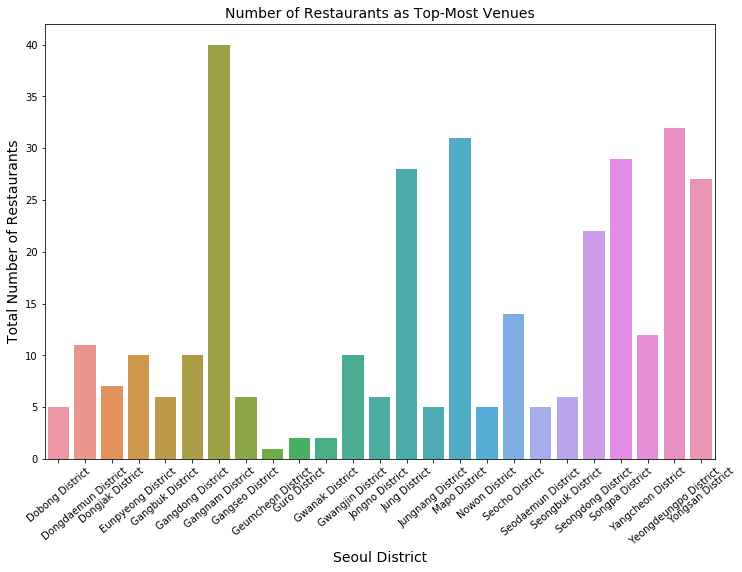

In [31]:
Seoul_venues_restaurant = seoul_restaurant.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Seoul_venues_restaurant_df = Seoul_venues_restaurant.to_frame().reset_index()
Seoul_venues_restaurant_df.columns = ['District', 'Number of Restaurant']
Seoul_venues_restaurant_df.index = np.arange(1, len(Seoul_venues_restaurant_df)+1)

fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=Seoul_venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Seoul District", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
plt.show()

## KMeans Clustering

In [32]:
#One Hot Encoding
### Use One Hot Encoding to Get More Information about the Venue Categories 
df_onehot = pd.get_dummies(seoul_restaurant[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
df_onehot['District'] = seoul_restaurant['District'] 
### move district column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

In [33]:
seoul_restaurant2 = df_onehot.groupby('District').mean().reset_index()
seoul_restaurant2.index = np.arange(1, len(seoul_restaurant2)+1)
seoul_restaurant2

,District,African Restaurant,American Restaurant,Asian Restaurant,Bunsik Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Fast Food Restaurant,...,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Dobong District,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Dongdaemun District,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,...,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000
3,Dongjak District,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.142857,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Eunpyeong District,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Gangbuk District,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Gangdong District,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,...,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
7,Gangnam District,0.000000,0.000000,0.000000,0.025000,0.000000,0.050000,0.000000,0.000000,0.050000,...,0.100000,0.0,0.000000,0.000000,0.050000,0.000000,0.000000,0.025000,0.025000,0.000000
8,Gangseo District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
9,Geumcheon District,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,Guro District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
num_top_venues = 5

for places in seoul_restaurant2['District']:
    print(places)
    temp = seoul_restaurant2[seoul_restaurant2['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Dobong District
                  Venue  Freq
0     Korean Restaurant   0.6
1    Chinese Restaurant   0.2
2  Fast Food Restaurant   0.2
3       Soba Restaurant   0.0
4      Ramen Restaurant   0.0


Dongdaemun District
                       Venue  Freq
0          Korean Restaurant  0.27
1        Japanese Restaurant  0.18
2         Italian Restaurant  0.18
3  Japanese Curry Restaurant  0.09
4         Chinese Restaurant  0.09


Dongjak District
                  Venue  Freq
0     Korean Restaurant  0.43
1     Bunsik Restaurant  0.14
2   Dumpling Restaurant  0.14
3  Fast Food Restaurant  0.14
4    Italian Restaurant  0.14


Eunpyeong District
                  Venue  Freq
0  Fast Food Restaurant   0.5
1     Korean Restaurant   0.4
2     Bunsik Restaurant   0.1
3       Soba Restaurant   0.0
4      Ramen Restaurant   0.0


Gangbuk District
                Venue  Freq
0   Korean Restaurant  0.67
1  Chinese Restaurant  0.17
2   French Restaurant  0.17
3     Udon Restaurant  0.00
4     Thai Re

In [35]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = seoul_restaurant2['District']

for ind in np.arange(seoul_restaurant2.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seoul_restaurant2.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Dobong District,Korean Restaurant,Fast Food Restaurant,Chinese Restaurant,Janguh Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Gukbap Restaurant,French Restaurant,Vietnamese Restaurant
2,Dongdaemun District,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Fast Food Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant
3,Dongjak District,Korean Restaurant,Bunsik Restaurant,Italian Restaurant,Fast Food Restaurant,Dumpling Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Japanese Curry Restaurant,Asian Restaurant
4,Eunpyeong District,Fast Food Restaurant,Korean Restaurant,Bunsik Restaurant,Janguh Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Gukbap Restaurant,French Restaurant,Vietnamese Restaurant
5,Gangbuk District,Korean Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Janguh Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Gukbap Restaurant,Vietnamese Restaurant


In [41]:
# set number of clusters
kclusters = 5

seoul_clustering = seoul_restaurant2.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seoul_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5]) 

Check the 5 Cluster labels : [1 4 4 3 1]


In [42]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Seoul_district_cluster_merged = df_seoul

#merge the inital seoul dataframe with Sorted Most Visited places for each neighborhood

Seoul_district_cluster_merged = Seoul_district_cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='District')

Seoul_district_cluster_merged.head() 

,District,City,Population,Area,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dobong District,Seoul,"366,879",20.70,37.670255,127.032688,1,Korean Restaurant,Fast Food Restaurant,Chinese Restaurant,Janguh Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Gukbap Restaurant,French Restaurant,Vietnamese Restaurant
1,Dongdaemun District,Seoul,"366,633",14.20,37.582540,127.055219,4,Korean Restaurant,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Fast Food Restaurant,French Restaurant,Indonesian Restaurant,Indian Restaurant
2,Dongjak District,Seoul,"402,567",16.35,37.499687,126.951246,4,Korean Restaurant,Bunsik Restaurant,Italian Restaurant,Fast Food Restaurant,Dumpling Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Japanese Curry Restaurant,Asian Restaurant
3,Eunpyeong District,Seoul,"491,741",29.71,37.619948,126.925604,3,Fast Food Restaurant,Korean Restaurant,Bunsik Restaurant,Janguh Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Gukbap Restaurant,French Restaurant,Vietnamese Restaurant
4,Gangbuk District,Seoul,"345,502",23.61,37.645173,127.009270,1,Korean Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Janguh Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Gukbap Restaurant,Vietnamese Restaurant


In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Seoul_district_cluster_merged[' Latitude'], 
                                  Seoul_district_cluster_merged[' Longitude'], 
                                  Seoul_district_cluster_merged['District'], 
                                  Seoul_district_cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters